# KNN ile ikili Sınıflandırma

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
X_train = np.array([[160,65],[170,85],[185,85],[188,82],[155,50],[161,58],[180,68],[157,52],[170,66]])
y_train = np.array(['K','E','E','E','K','K','E','K','K'])

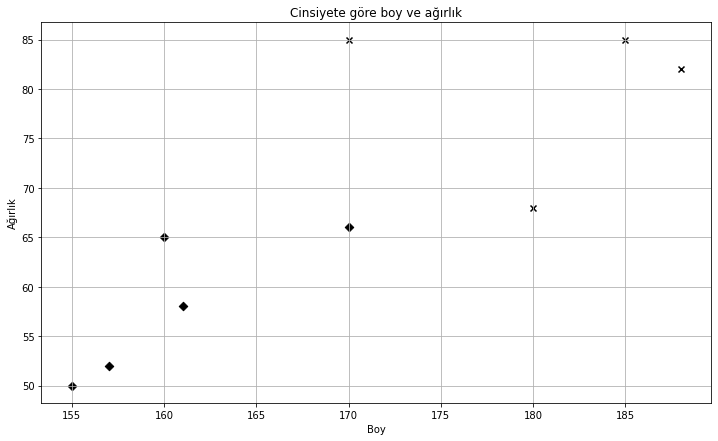

In [24]:
plt.figure(figsize=(12,7))
plt.title('Cinsiyete göre boy ve ağırlık')
plt.xlabel('Boy')
plt.ylabel('Ağırlık')
for i,x in enumerate(X_train):
    plt.scatter(x[0],x[1],c = 'k',marker = 'x' if y_train[i]=='E' else 'D')
plt.grid(True)
plt.show()

In [25]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_train

array([[1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1]])

In [26]:
from sklearn import neighbors

n_neighbors = 3
clf = neighbors.KNeighborsClassifier(n_neighbors,weights='distance')
clf.fit(X_train,y_train)
clf.predict(X_train)

c:\Users\oktay\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 0, 0, 0, 1, 1, 0, 1, 1])

In [27]:
from matplotlib.colors import ListedColormap
h = .02

In [28]:
cmap_light = ListedColormap(['#FFAAAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000','#191213'])

In [29]:
x_min , x_max = X_train[:,0].min() - 1,X_train[:,0].max() +1
y_min ,y_max = X_train[:,1].min() - 1,X_train[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [30]:
z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

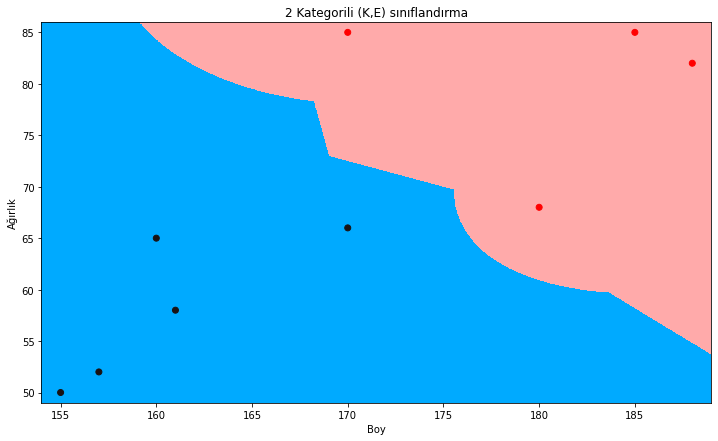

In [31]:
plt.figure(figsize=(12,7))
plt.pcolormesh(xx,yy,z,cmap=cmap_light)
plt.scatter(X_train[:,0],X_train[:,1],c = y_train[:,0],cmap=cmap_bold)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title('2 Kategorili (K,E) sınıflandırma')
plt.xlabel('Boy')
plt.ylabel('Ağırlık')
plt.show()

In [32]:
#öklityen mesafesini hesaplama
val = np.array([[170,75]])
mesafe = np.sqrt(np.sum((X_train-x)**2,axis = 1))
mesafe

array([10.04987562, 19.        , 24.20743687, 24.08318916, 21.9317122 ,
       12.04159458, 10.19803903, 19.10497317,  0.        ])

In [33]:
X_test = np.array([[170,75],[180,95],[160,50],[165,62],[167,88]])
y_test = ['E','E','K','K','K']
y_test = lb.transform(y_test)
y_test

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [34]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 0])

In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

print('Accuracy:',accuracy_score(y_test,y_pred))
print('Precision:',precision_score(y_test,y_pred))
print('Recall',recall_score(y_test,y_pred))
print('F1 score',f1_score(y_test,y_pred))

print(classification_report(y_test,y_pred,target_names=['E','K'],labels = [0,1]))

Accuracy: 0.8
Precision: 1.0
Recall 0.6666666666666666
F1 score 0.8
              precision    recall  f1-score   support

           E       0.67      1.00      0.80         2
           K       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



# Roc Curve

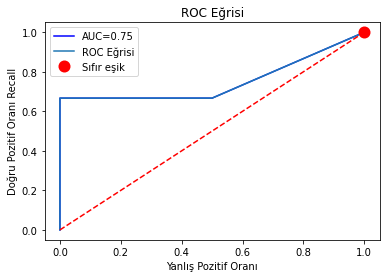

In [37]:
from sklearn.metrics import roc_curve,auc 

prediction = clf.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,prediction[:,1])
roc_auc = auc(fpr,tpr)

plt.plot(fpr,tpr,'b',label = 'AUC=%0.2f'%roc_auc )
plt.plot(fpr,tpr,label = 'ROC Eğrisi')
plt.title('ROC Eğrisi')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı Recall')
plt.plot([0,1],[0,1],'r--')

close_zero = np.argmin(np.abs(threshold))
plt.plot(fpr[close_zero],tpr[close_zero],'o',markersize = 10,label = 'Sıfır eşik',c = 'r',mew=2)
plt.legend()
plt.show()

# Confusion Matrix

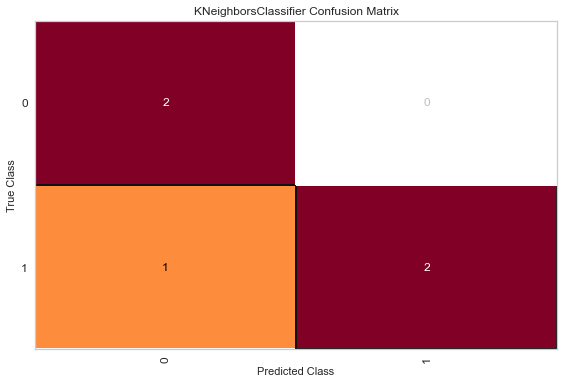

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [38]:
from yellowbrick.classifier import ConfusionMatrix

kategori =['E','K']
cm = ConfusionMatrix(clf)
cm.fit(X_train,y_train)
cm.score(X_test,y_test)
cm.poof()

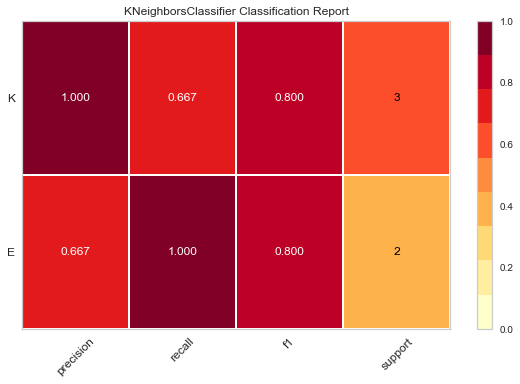

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [39]:
from yellowbrick.classifier import ClassificationReport

cr = ClassificationReport(clf,classes=kategori,support=True)
cr.fit(X_train,y_train)
cr.score(X_test,y_test)
cr.poof()